In [1]:
#we will be exploring FAANG stocks from 2012-2020. Looking at basic graphs.

In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.pyplot import figure

In [3]:
#importing databases of FAANG stocks
fb_data = pd.read_csv('C:/Users/Jonat/Desktop/Springboard/Data/Data/Data/FB/FB.csv')
amzn_data = pd.read_csv('C:/Users/Jonat/Desktop/Springboard/Data/Data/Data/AMZN/AMZN.csv')
aapl_data = pd.read_csv('C:/Users/Jonat/Desktop/Springboard/Data/Data/Data/AAPL/AAPL.csv')
nflx_data = pd.read_csv('C:/Users/Jonat/Desktop/Springboard/Data/Data/Data/NFLX/NFLX.csv')
googl_data = pd.read_csv('C:/Users/Jonat/Desktop/Springboard/Data/Data/Data/GOOGL/GOOGL.csv')

In [4]:
print(fb_data.info(),fb_data.isnull().sum())
print(amzn_data.info(),amzn_data.isnull().sum())
print(aapl_data.info(),aapl_data.isnull().sum())
print(nflx_data.info(),nflx_data.isnull().sum())
print(googl_data.info(),googl_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2068 non-null   object 
 1   Open       2068 non-null   float64
 2   High       2068 non-null   float64
 3   Low        2068 non-null   float64
 4   Close      2068 non-null   float64
 5   Adj Close  2068 non-null   float64
 6   Volume     2068 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 113.2+ KB
None Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5846 entries, 0 to 5845
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5846 non-null   object 
 1   Open       5846 non-null   float64
 2   High       5846 non-null   float64
 3   Low        5846 non-null   float64
 

In [5]:
#setting data paramters to 2012-05-18 -- 2020-08-01 as they are common to all dataframes
googl_data = googl_data[(googl_data['Date']>='2012-05-18') & (googl_data['Date']<= '2020-08-01')]
fb_data = fb_data[(fb_data['Date']>='2012-05-18') & (fb_data['Date']<= '2020-08-01')]
amzn_data = amzn_data[(amzn_data['Date']>='2012-05-18') & (amzn_data['Date']<= '2020-08-01')]
aapl_data = aapl_data[(aapl_data['Date']>='2012-05-18') & (aapl_data['Date']<= '2020-08-01')]
nflx_data = nflx_data[(nflx_data['Date']>='2012-05-18') & (nflx_data['Date']<= '2020-08-01')]

In [6]:
#creating dataframes of the data to be used and renaming
googl_data_filtered = googl_data[['Date','Adj Close']]
googl_data_filtered.columns = ['Date','Googl Adj Close']
fb_data_filtered = fb_data[['Date','Adj Close']]
fb_data_filtered.columns = ['Date','FB Adj Close']
amzn_data_filtered = amzn_data[['Date','Adj Close']]
amzn_data_filtered.columns = ['Date','Amzn Adj Close']
aapl_data_filtered = aapl_data[['Date','Adj Close']]
aapl_data_filtered.columns = ['Date','Aapl Adj Close']
nflx_data_filtered = nflx_data[['Date','Adj Close']]
nflx_data_filtered.columns = ['Date','Nflx Adj Close']

In [7]:
#merging data frames and setting index
df1 = googl_data_filtered.merge(fb_data_filtered,on='Date',how='inner')
df2 = df1.merge(amzn_data_filtered,on='Date',how='inner')
df3 = df2.merge(aapl_data_filtered,on='Date',how='inner')
df = df3.merge(nflx_data_filtered,on='Date',how='inner')
df.set_index('Date',inplace=True)
print(df.head())
print(df.shape)

            Googl Adj Close  FB Adj Close  Amzn Adj Close  Aapl Adj Close  \
Date                                                                        
2012-05-18       300.500488     38.230000      213.850006       65.592659   
2012-05-21       307.362366     34.029999      218.110001       69.414101   
2012-05-22       300.700714     31.000000      215.330002       68.881065   
2012-05-23       305.035034     32.000000      217.279999       70.561768   
2012-05-24       302.132141     33.029999      215.240005       69.913734   

            Nflx Adj Close  
Date                        
2012-05-18        9.994286  
2012-05-21       10.248571  
2012-05-22        9.672857  
2012-05-23       10.272857  
2012-05-24       10.038571  
(2064, 5)


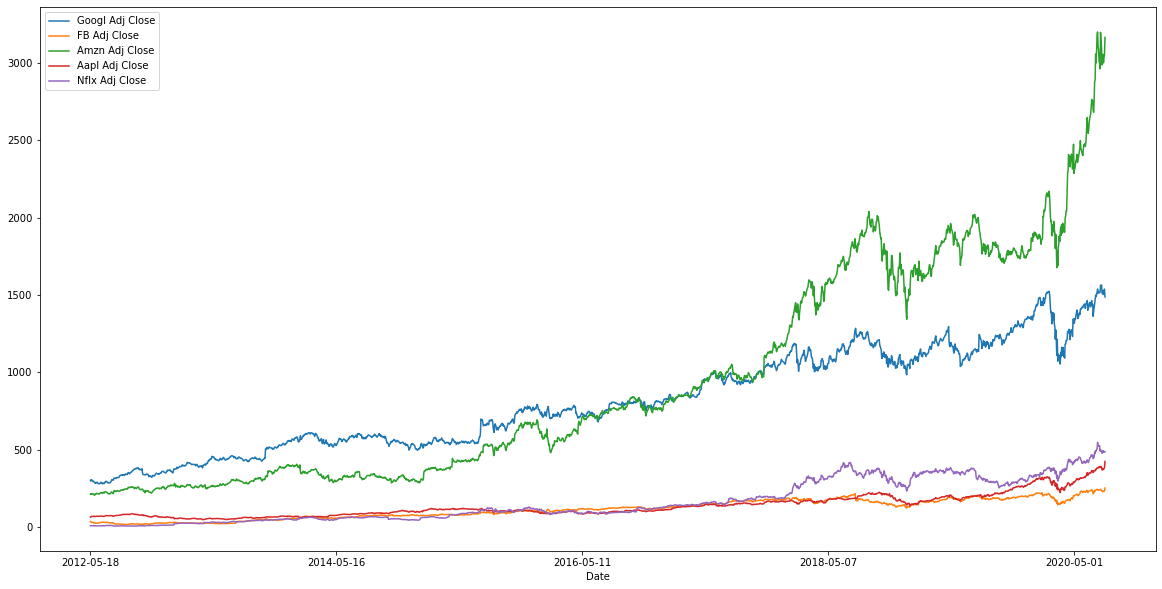

In [8]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
df.plot(ax=ax)

In [9]:
#next steps: simple moving avg, pandas rollingmean and std,plot them,compare raw vs rolling various days,momentum stock

In [10]:
#setting up dataframes with columns names but does NOT reflect the data. Only used for plot legend.
df_rolling = df.copy(deep=False)
df_std = df.copy(deep=False)
df_exponential_rolling = df.copy(deep=False)
df_rolling.columns = [['Googl Adj Close RL','FB Adj Close RL','Amzn Adj Close RL','Aapl Adj Close RL','Nflx Adj Close RL']]
df_std.columns = [['Googl Adj Close std','FB Adj Close std','Amzn Adj Close std','Aapl Adj Close std','Nflx Adj Close std']]
df_exponential_rolling.columns = [['Googl Adj Close EXP','FB Adj Close EXP','Amzn Adj Close EXP','Aapl Adj Close EXP','Nflx Adj Close EXP']]

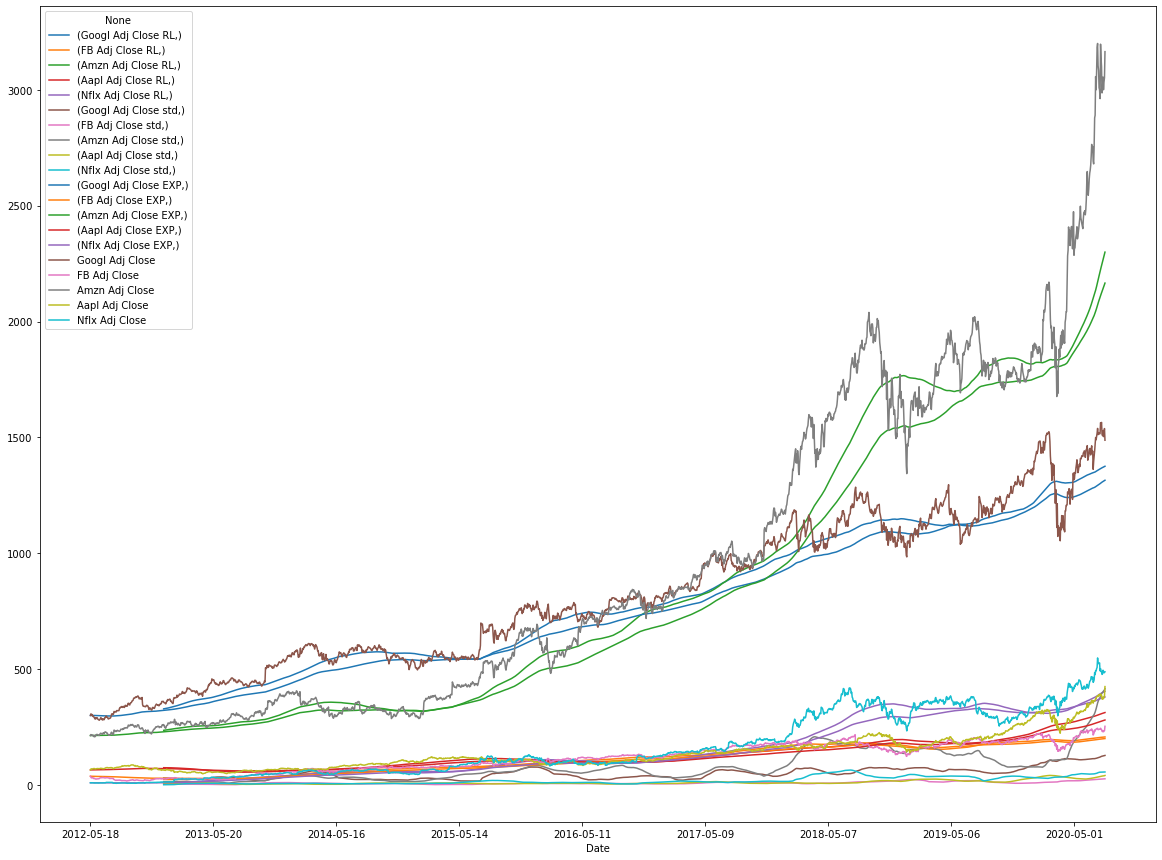

In [11]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
df_rolling.rolling(150).mean().plot(ax=ax)
df_std.rolling(150).std().plot(ax=ax)
df_exponential_rolling.ewm(150,adjust=False).mean().plot(ax=ax)
df.plot(ax=ax)

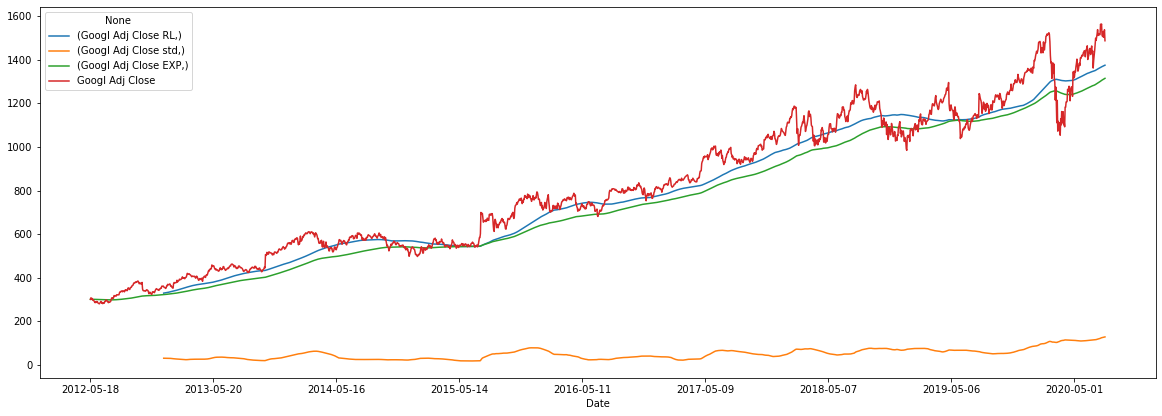

In [58]:
#using Google as the focus
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(211)
df_rolling[['Googl Adj Close RL']].rolling(150).mean().plot(ax=ax)
df_std[['Googl Adj Close std']].rolling(150).std().plot(ax=ax)
df_exponential_rolling[['Googl Adj Close EXP']].ewm(150,adjust=False).mean().plot(ax=ax)
df[['Googl Adj Close']].plot(ax=ax)

In [71]:
# function bollinger band chart: SMA (middle), The upper and lower bands are typically 2 standard deviations +/- 
#from a 20-day simple moving average, but can be modified.
def bollinger_band_plt(df,col,window,std,start,end):
    rolling_mean = df[col].loc[start:end].rolling(window).mean()
    rolling_std = df[col].loc[start:end].rolling(window).std()
    
    bollinger_high = rolling_mean + (rolling_std * std)
    bollinger_low = rolling_mean - (rolling_std * std)
    
    bollinger_band_df =  pd.DataFrame({'Bollinger High':bollinger_high,'Bollinger Low':bollinger_low,'SMA':rolling_mean}
                                      ,index=df.index)
    
    bollinger_band_df.dropna(inplace=True)
    bollinger_band_df.plot()
    return bollinger_band_df

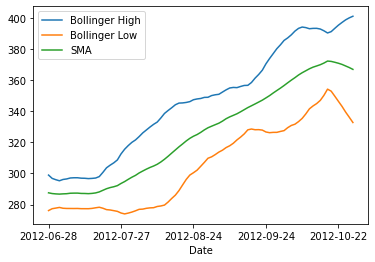

In [74]:
test_data = bollinger_band_plt(df,'Googl Adj Close',25,2,'2012-05-24','2012-10-27')

In [20]:
test_data.head(20)

,Bollinger High,Bollinger Low,SMA
Date,,,
2013-05-17,441.774168,269.815700,355.794934
2013-05-20,443.008526,269.815096,356.411811
2013-05-21,444.243508,269.752727,356.998117
2013-05-22,445.236355,269.915515,357.575935
2013-05-23,446.173441,270.072843,358.123142
2013-05-24,446.989183,270.336821,358.663002
2013-05-28,447.822485,270.663639,359.243062
2013-05-29,448.532745,271.050356,359.791551
2013-05-30,449.227246,271.487106,360.357176


In [21]:
#RSI Function
df['Googl Adj Close']

Date
2012-05-18     300.500488
2012-05-21     307.362366
2012-05-22     300.700714
2012-05-23     305.035034
2012-05-24     302.132141
                 ...     
2020-07-27    1529.430054
2020-07-28    1503.650024
2020-07-29    1523.510010
2020-07-30    1538.369995
2020-07-31    1487.949951
Name: Googl Adj Close, Length: 2064, dtype: float64

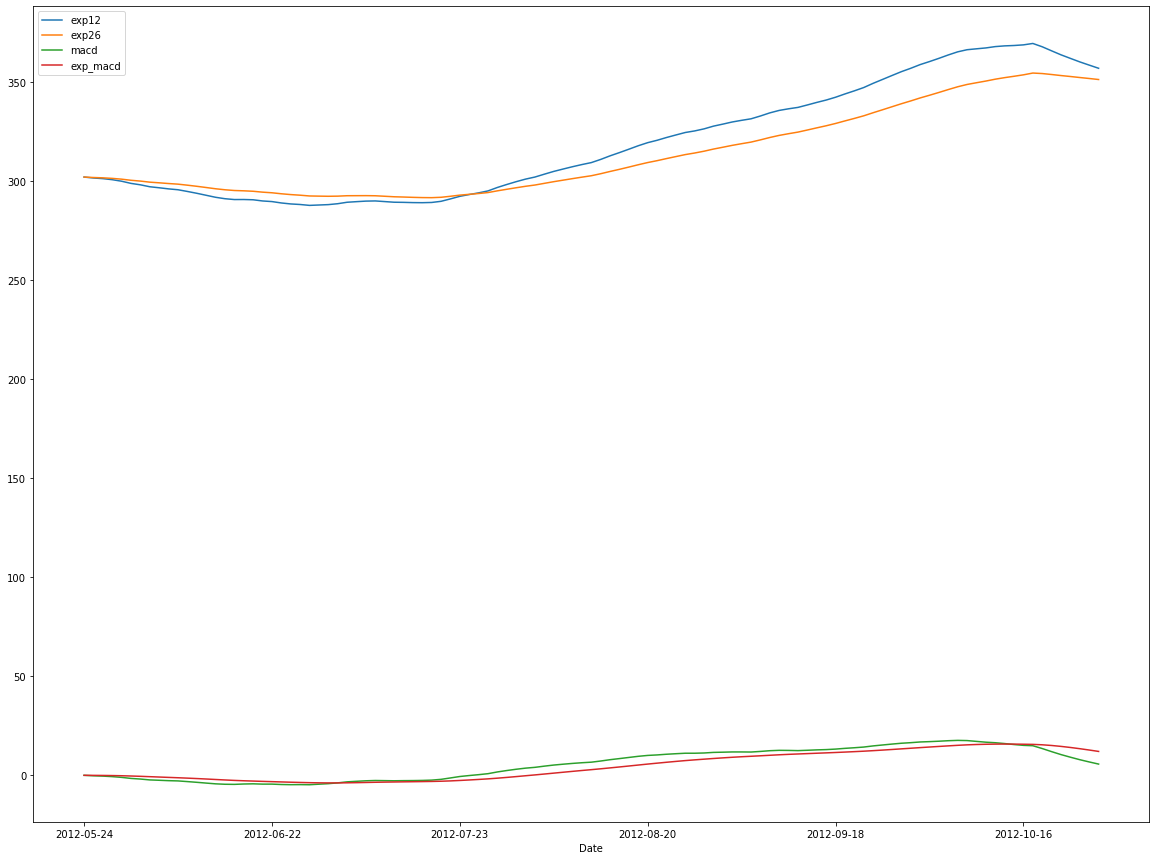

In [79]:
#MACD Functiom Moving Average Convergence Divergence (MACD) is calculated by subtracting the 26-period exponential moving average (EMA) from the 12-period EMA.
#Along with the MACD line (from subtracting the 12 period EMA from the 16 period EMA) the chart commonly will include a signal
#line plotted on top of the MACD. This signal line is a 9 day EMA of the MACD
def MACD(df,col,start,end):
    exp12 = df[col].loc[start:end].ewm(12,adjust=False).mean()
    exp26 = df[col].loc[start:end].ewm(26,adjust=False).mean()
    
    macd = exp12 - exp26
    exp_macd = macd.ewm(9,adjust=False).mean()
    
    macd_df = pd.DataFrame({'exp12':exp12,'exp26':exp26,'macd':macd,'exp_macd':exp_macd})
    macd_df.dropna(inplace=True)
    macd_df.plot(ax=ax)
    
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)  
MACD(df,'Googl Adj Close','2012-05-24','2012-10-27')

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits=3)



In [31]:
training_data = df['Googl Adj Close'].loc['2012-05-18':'2019-12-31']
testing_data = df['Googl Adj Close'].loc['2020-01-01':'2020-08-01']
print(training_data.shape,testing_data.shape)

(1917,) (147,)


In [83]:
training_data_scaled = np.log2(training_data)+1